In [1]:
import numpy as np
from moviepy.editor import VideoFileClip
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib qt
%matplotlib inline

# Difference and Sum idea

In [2]:
imagefile = '../k9-train/180909/HanDep/Straight/IMG_0003_MOV/frame585.jpg'
myimg = cv2.imread(imagefile)
myimg = cv2.cvtColor(myimg, cv2.COLOR_BGR2HLS)
myimg = myimg[330:,:,1]

In [11]:
myimg2 = cv2.GaussianBlur(myimg,(101,101),0)
myimg1 = np.copy(myimg)

In [20]:
allmean = np.mean(myimg)
(r,c)=myimg.shape
thresh = allmean - 30  #smooth all values 30  below average
nfilter=100
lowinds = np.where(myimg < thresh)
myimg1[lowinds] = myimg2[lowinds]

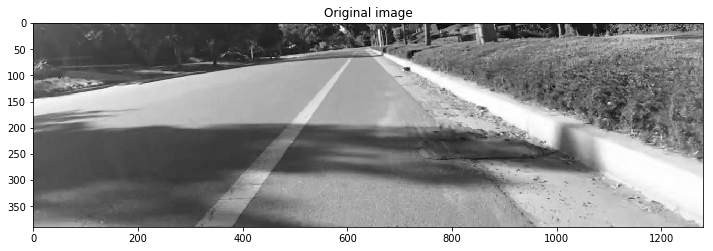

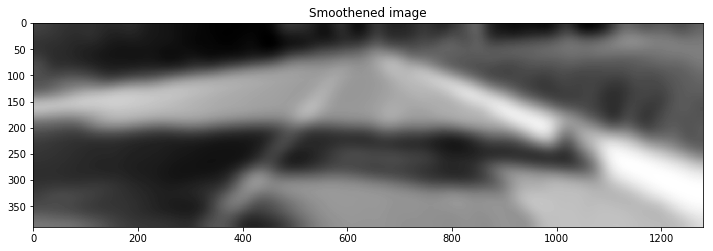

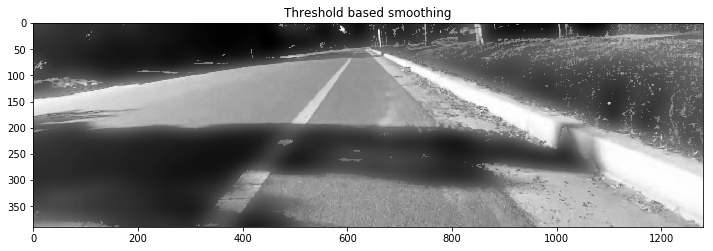

In [21]:
plt.figure(figsize=(12,4))
plt.imshow(myimg,cmap='gray')
plt.title('Original image')
plt.figure(figsize=(12,4))
plt.imshow(myimg2,cmap='gray')
plt.title('Smoothened image')
plt.figure(figsize=(12,4))
plt.imshow(myimg1,cmap='gray')
plt.title('Threshold based smoothing')

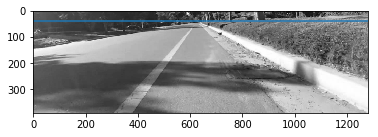

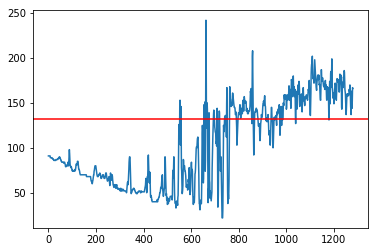

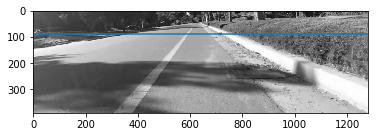

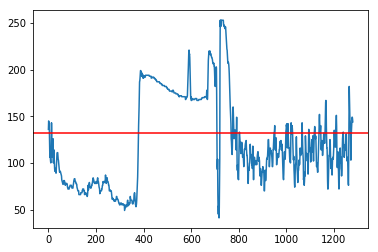

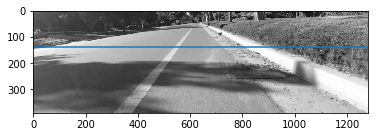

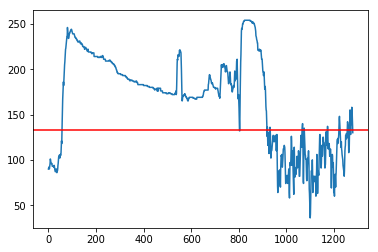

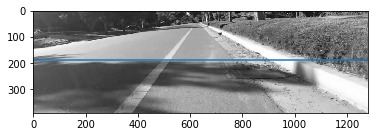

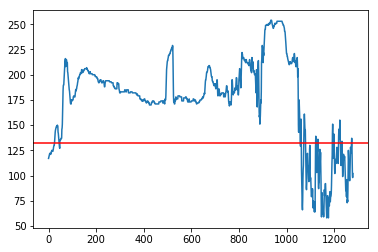

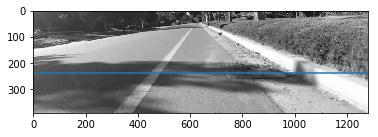

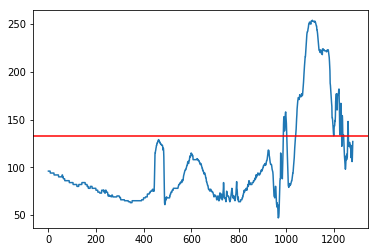

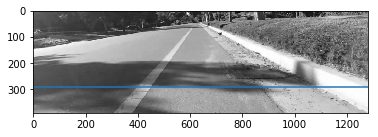

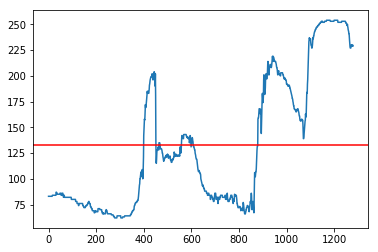

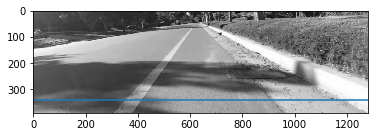

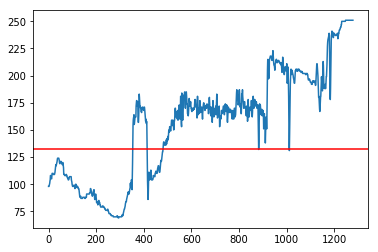

In [19]:
for hval in range(39,389,50):
    plt.figure()
    plt.imshow(myimg,cmap='gray')
    plt.axhline(hval)
    plt.figure()
    allmean=np.mean(myimg)
    #hmean = np.mean(myimg[hval,:])
    plt.plot(myimg[hval,:])
    #plt.axhline(hmean)
    plt.axhline(allmean,color='r')

# Paper forwarded by Ravi (Put link)
1. Read an image in RGB
1. Apply the M transformation
1. Compute chromaticity coordinates for r and b
1. Project (log b, log r) into a one dimensional value along the angled line
1. See the grayscale image along the angled line

In [91]:
imagefile = '../k9-train/180909/HanDep/Straight/IMG_0003_MOV/frame550.jpg'
myimg = cv2.imread(imagefile)
myimg = cv2.cvtColor(myimg, cv2.COLOR_BGR2RGB)
(m,n,c)=myimg.shape
tr_img = np.zeros_like(myimg).astype('float64')
eta=10
M = [0.9988,-0.0669,-0.0001,-0.0497,0.9886,-0.0001,-0.0043,-0.1346,1.0]
M = np.array(M).reshape(3,3)
for ii in range(m):
    for jj in range(n):
        ch=np.dot(M,myimg[ii,jj,:])
        if ch[0]>eta and ch[0]<(255-eta) and ch[1]>eta and ch[1]<(255-eta) and ch[2]>eta and ch[2]<(255-eta):
            (t1,t2,t3) = (np.log(ch[0]),np.log(ch[1]),np.log(ch[2]))
            logr = 0.6667*t1 - 0.3333*t2 -0.3333*t3
            logb = 0.6667*t3 - 0.3333*t1 -0.3333*t2
            tr_img[ii,jj,0] = logr
            tr_img[ii,jj,1] = logb
            myproj = logr*np.cos(np.pi-2.3) + logb*np.sin(np.pi-2.3)
            tr_img[ii,jj,2] = np.exp(myproj)

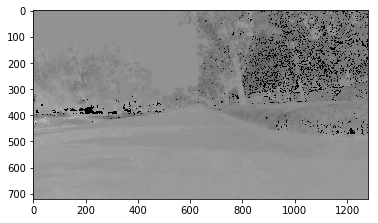

In [92]:
import matplotlib.pyplot as plt
plt.imshow(tr_img[:,:,2],cmap='gray')

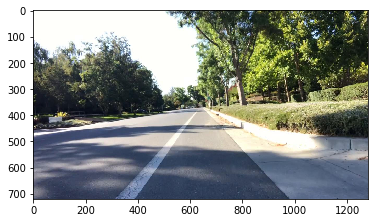

In [93]:
plt.imshow(myimg)